### The intuitive of Probability Theory


### Bayesian Formula is actually coming from the 'Full Probability', which is the natural property of the Probability Space.



Logic:
    
#### 1.From Measure Space (X, A, μ) 
  
  μ ∈ (-∞, +∞)

set P ∈[0,1], we get Probability Space (Ω, F, P)

Probability Space has Three Axioms or features:
1. P(Ω) = 1
2. P(A) >= 0 
3. Countable Additivity.     For mutually exclusive events/sets: P(AB) = p(A) + P(B)

#### 2.Define  A|B and Multiplication Rule

  The Prob of AB given B happened.
  Let P(A|B) = #(AB) / #B = #(AB)/#Ω/#B/#Ω = P(AB)/P(B)

So Conditional Probability is just an intuitive definition from classical probability. 

By looking at the Venn diagram, it is the proportion of area of AnB over the area of B.


 Event is set, all the manipulation rules on set work well for event.
 
 i.e. the law of Commutation.
 
 P(AB) = P(BA) = P(B)P(A|B) = P(A)P(B|A)

#### 3. Full probability decomposition

First, let split the Ω space into n parts, i.e A1, A2 and A3. Easy to know, they are mutually exclusive

Thus, 
P(B) = P(BΩ) = P(B(A1 ∪ A2 ∪ A3)) = P(BA1) + P(BA2) + P(BA3)

According to the Multi-Rule, we can transfer P(BA1) => P(B)P(A1|B) or P(A1)P(B|A1)

If P(A1) is easier to calculate, lets expand it based on P(A)

Thus, P(B) = P(A1)P(B|A1) + P(A2)P(B|A2) + ...



#### 4. Bayesian
 P(Ai|B) = P(Ai)P(B|Ai) / P(B)
 
 where P(B) can be full prob decomp

===============================

### [DEEP DIVE]

#### Phase I

Here, let's first split the prob space into 2 parts: A1 and A2. 

Prob of A1 happen = a, Prob of A2 happen = 1-a.

#### Phase II
Then, we introduce event or test B. In terms of causality, B is the effect, while the A1 and A2 are the cause.

Assume:

  P(B|A1) = x    
  P(B|A2) = y    
  n = x/y

Based on the Bayesian, P(A1|B) = a*x/(a*x + (1-a)*y) = 1/(1 + a*(1/n - 1))

## I'd like to show a very intuitive rule here:
    If a is really small, even if x is >> y, the prob of A1 conditional on B could still be very tiny.
    
    Below is the 3D plot between a, n and P(A1|B):

z = P(A1|B)

In [5]:
def z(x, y):  
    return 1 / (1 + y * (1 / x - 1))

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

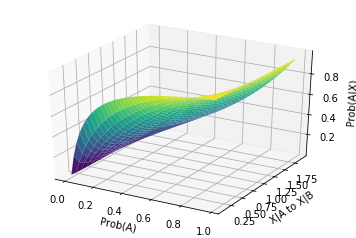

In [9]:
fig = plt.figure()
ax = fig.gca(projection='3d')

x = np.arange(0.001, 1, 0.025)   # x ∈ [0, 1]
a = np.arange(0.1, 2, 0.1)   # x ∈ [0, 2]

X, Y = np.meshgrid(x, a)

ax.plot_surface(X, Y, z(X, Y), cmap='viridis')

ax.set_xlabel('Prob(A)')
ax.set_ylabel('X|A to X|B')
ax.set_zlabel('Prob(A|X)')

plt.show()

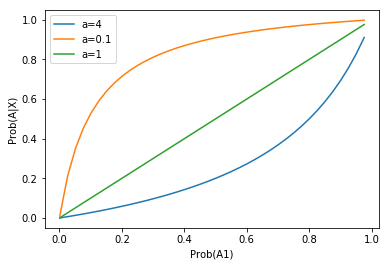

In [11]:
a1 = 4  # if P(B|A1) << P(B|A2)
plt.plot(x, 1/(1+a1*(1/x-1)), label='a=' + str(a1))

a1 = 0.1  # if P(B|A1) >> P(B|A2)
plt.plot(x, 1/(1+a1*(1/x-1)), label='a=' + str(a1))

a1 = 1    # if P(B|A1) = P(B|A2)
plt.plot(x, 1/(1+a1*(1/x-1)), label='a=' + str(a1))

plt.xlabel('Prob(A1)')
plt.ylabel('Prob(A|X)')

           
plt.legend()
plt.show()


Given P(B|A1) > P(B|A2), the function above will be concave function. 